# Calculating Climatological Averages

The previous example showed one of the most basic GeoCAT-comp functions. This example showcases how some functions in GeoCAT-comp have a variety of options that can be selected using keyword arguments. The particular function we'll be looking at is `climatology_average`.

The datafile we're using contains surface temperature data at one location generated by numerous weather models in a model ensemble. The temporal resolution is 6 hours from January 1st 1990 to January 1st 1996. We want to take the data from each model and summarize it. We can do this in a few different ways with `climatology_average`. We can find the daily, monthly, or seasonal averages across all the years in the dataset.

*Dependencies*
- geocat.comp
- geocat.datafiles
- xarray
- nc-time-axis

## Imports

In [1]:
from geocat.comp import climatology_average

import geocat.datafiles as gdf
import xarray as xr
import numpy as np

## Retrieving sample data from GeoCAT-datafiles
[GeoCAT-datafiles](https://github.com/ncar/geocat-datafiles) is a software package that makes it simple to download datafiles from the pacakge's GitHub repository. The repository holds data files of different types such as NetCDF and GRIB. They are used for GeoCAT tutorials, demonstrations, and test cases. You won't need to use GeoCAT-datafiles when working with your own data.

In [2]:
nc_file = gdf.get('netcdf_files/atm.20C.hourly6-1990-1995-TS.nc')
nc_file

'/Users/hcraker/Library/Caches/geocat/netcdf_files/atm.20C.hourly6-1990-1995-TS.nc'

## Parsing the data with xarray
GeoCAT-comp is designed to work with [`xarray`](https://xarray.dev/) and [`numpy`](https://numpy.org/) data structures. Here we will be using `xarray` to import the netCDF data.

In [3]:
ds = xr.open_dataset(nc_file)
ds

<xarray.Dataset>
Dimensions:    (member_id: 40, time: 8761, nbnd: 2)
Coordinates:
    lat        float64 ...
    lon        float64 ...
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 ... 34 35 101 102 103 104 105
  * time       (time) object 1990-01-01 00:00:00 ... 1996-01-01 00:00:00
    time_bnds  (time, nbnd) object ...
Dimensions without coordinates: nbnd
Data variables:
    TS         (member_id, time) float32 ...
Attributes: (12/13)
    Conventions:               CF-1.0
    NCO:                       4.3.4
    Version:                   $Name$
    important_note:            This data is part of the project 'Blind Evalua...
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-...
    logname:                   mudryk
    ...                        ...
    revision_Id:               $Id$
    source:                    CAM
    title:                     UNSET
    topography_file:           /scratch/p/pjk/mudryk/cesm1_1_2_LENS/inputdata...
    intake_esm_varname:        TS
    intake_esm_dataset_key:    atm.20C.hourly6-1990-2005

We can see here that the datafile has surface temperature data from 40 model ensemble members. Let's simplify things and just look at one model for now. We use `xarray`'s `DataArray.isel` method to pick out the data for the first member_id (remember the first index is 0).

In [4]:
ds = ds.isel(member_id=0)  # select one model from the ensemble
temp = ds.TS  # surface temperature data
temp

<xarray.DataArray 'TS' (time: 8761)>
array([      nan, 301.88226, 301.88226, ..., 302.33292, 302.33292, 302.33292],
      dtype=float32)
Coordinates:
    lat        float64 0.4712
    lon        float64 180.0
    member_id  int64 1
  * time       (time) object 1990-01-01 00:00:00 ... 1996-01-01 00:00:00
Attributes:
    long_name:  Surface temperature (radiative)
    units:      K

Now that we have the temperature data for the first ensemble member, let's plot it. `xarray` has built in methods to quickly plot data. The generated plot isn't publication quality, but it's a quick and dirty way to see what your dataset contains.

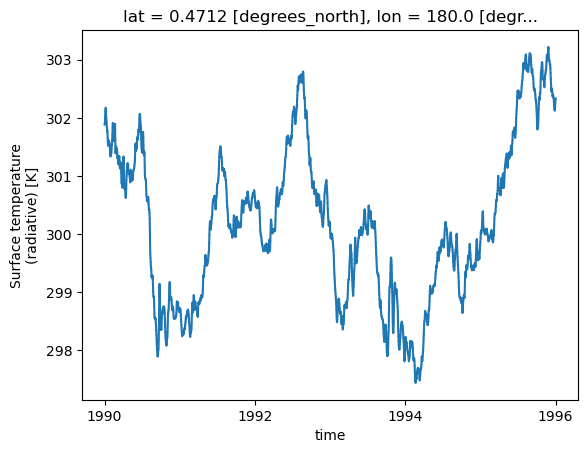

In [5]:
temp.plot()

This plot shows that the temperature doesn't change much throughout the year. This makes sense since the data is for the location 0.4712N 180E, which is in the Pacific Ocean just north of the equator. There is some variation though, and it'd be interesting to know what the avearage temperature is in each month. We can calculate this using `climatology_average`.

## Using climatology_average
[`climatology_average`](https://geocat-comp.readthedocs.io/en/latest/user_api/generated/geocat.comp.climatologies.climatology_average.html) takes in 3 arguments:
- `dset` - The input data. It must be uniformly space in the time dimension.
- `freq` - A string that specifies the desired frequency of the resulting averages (e.g. 'day' for daily climatology averages).
- `time_dim` - An optional argument used to pass in the name of the time coordinate.

In [6]:
monthly_temp = climatology_average(temp, 'month')
monthly_temp

<xarray.DataArray 'TS' (time: 12)>
array([299.70563, 299.382  , 299.45645, 299.87674, 300.33078, 300.91946,
       301.19077, 300.82486, 300.08514, 299.94785, 300.152  , 300.01614],
      dtype=float32)
Coordinates:
    lat        float64 0.4712
    lon        float64 180.0
    member_id  int64 1
  * time       (time) object 1993-01-16 12:00:00 ... 1993-12-16 12:00:00
Attributes:
    long_name:  Surface temperature (radiative)
    units:      K

Notice how much smaller the time dimension is. Before, the time dimension had a length of 8761 points, one for every 6 hour interval over 5 years. Now, the time dimension has a length of 12, one for every month of the year. Notice that the value of the time coordinate is for the middle of each month in 1993. Why 1993? It's approximatly the middle year in the dataset.

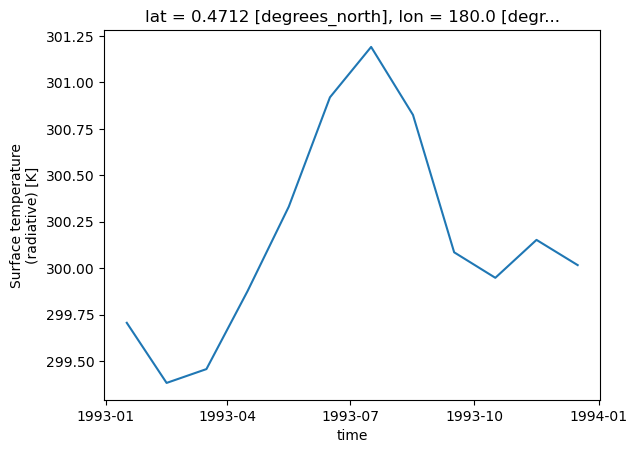

In [7]:
monthly_temp.plot()

When we plot this, the data is more granular and has even less variation in temperature from month to month. But we can now see which months are coldest and warmest on average for this location.